In [1]:
#import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import Dataset

In [5]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df=df[['BloodPressure','Age','Outcome']]
df

,BloodPressure,Age,Outcome
0,72,50,1
1,66,31,0
2,64,32,1
3,66,21,0
4,40,33,1
...,...,...,...
763,76,63,0
764,70,27,0
765,72,30,0
766,60,47,1


# DataPreparation

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

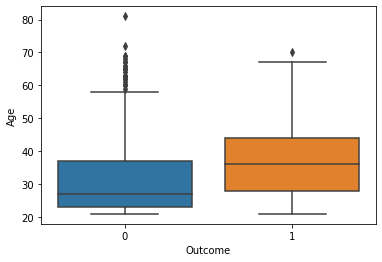

In [7]:
sns.boxplot(data=df,x='Outcome', y='Age')

In [28]:
drop_index=df[(df['Outcome']<1)
            & (df['Age']>35)
            ].index
drop_index
df=df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

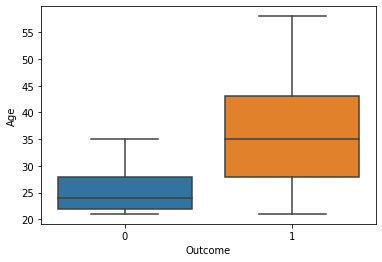

In [29]:
sns.boxplot(data=df,x='Outcome', y='Age')

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

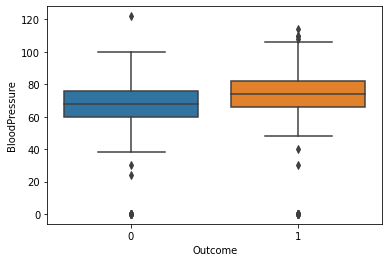

In [30]:
sns.boxplot(data=df,x='Outcome', y='BloodPressure')

In [33]:
drop_index=df[(df['Outcome']<1)
            & (df['BloodPressure']>99)].index
            
drop_index
df=df.drop(drop_index, axis=0)

In [36]:
drop_index=df[(df['Outcome']<1)
            & (df['BloodPressure']<40)].index
            
drop_index
df=df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

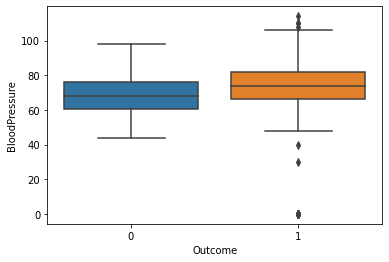

In [37]:
sns.boxplot(data=df,x='Outcome', y='BloodPressure')

In [40]:
drop_index=df[(df['Outcome']>0)
            & (df['BloodPressure']>100)].index
            
drop_index
df=df.drop(drop_index, axis=0)

In [43]:
drop_index=df[(df['Outcome']>0)
            & (df['BloodPressure']<50)].index
            
drop_index
df=df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

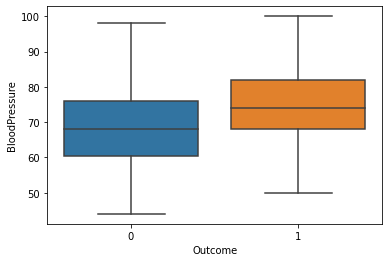

In [45]:
sns.boxplot(data=df,x='Outcome', y='BloodPressure')

In [46]:
df.isnull().sum()

BloodPressure    0
Age              0
Outcome          0
dtype: int64

# EDA

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 767
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BloodPressure  576 non-null    int64
 1   Age            576 non-null    int64
 2   Outcome        576 non-null    int64
dtypes: int64(3)
memory usage: 18.0 KB


In [48]:
df.describe()

,BloodPressure,Age,Outcome
count,576.000000,576.000000,576.000000
mean,71.062500,29.565972,0.399306
std,11.025327,8.701374,0.490181
min,44.000000,21.000000,0.000000
25%,64.000000,23.000000,0.000000
50%,70.000000,27.000000,0.000000
75%,78.500000,33.000000,1.000000
max,100.000000,58.000000,1.000000


In [52]:
df['Outcome'].value_counts()

0    346
1    230
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

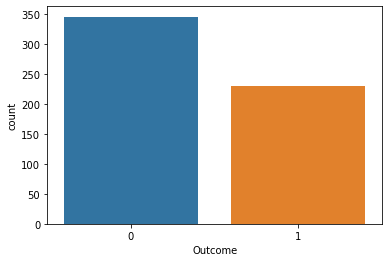

In [53]:
sns.countplot(data=df,x='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

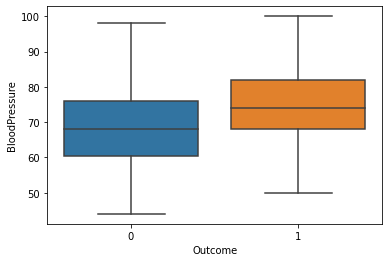

In [54]:
sns.boxplot(data=df,x='Outcome', y='BloodPressure')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

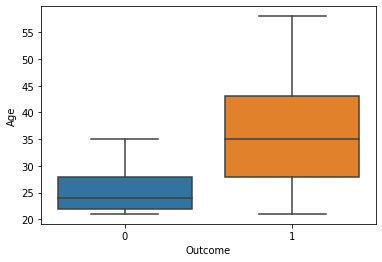

In [55]:
sns.boxplot(data=df,x='Outcome', y='Age')

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

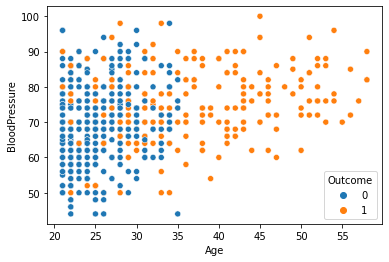

In [59]:
sns.scatterplot(data=df, x='Age', y='BloodPressure',hue='Outcome')

# Feature/Label

In [72]:
X=df.drop('Outcome',axis=1)
y=df[['Outcome']]

# Train/Test

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Scalling the Features

In [74]:
scaler=StandardScaler()

In [75]:
scaler.fit(X_train)

StandardScaler()

In [65]:
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Train the Model

In [66]:
log_model=LogisticRegression()

In [67]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

# Predicting Test Data

In [68]:
y_pred=log_model.predict(scaled_X_test)

# Evaluationg Model Performance

In [79]:
metrics.accuracy_score(y_test,y_pred)

0.7758620689655172

In [80]:
metrics.confusion_matrix(y_test,y_pred)

array([[26,  4],
       [ 9, 19]], dtype=int64)

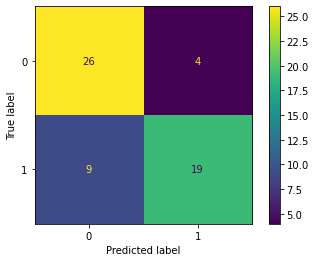

In [81]:
metrics.plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [82]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.83      0.68      0.75        28

    accuracy                           0.78        58
   macro avg       0.78      0.77      0.77        58
weighted avg       0.78      0.78      0.77        58



# ROC

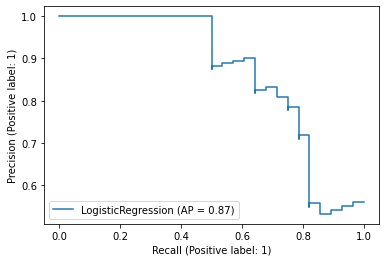

In [83]:
metrics.plot_precision_recall_curve(log_model, scaled_X_test,y_test)

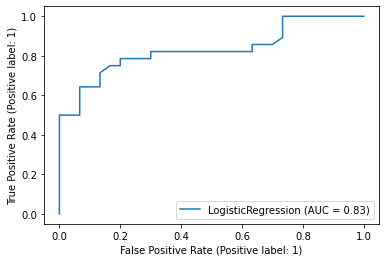

In [84]:
metrics.plot_roc_curve(log_model,scaled_X_test, y_test)